# DC Prediction Error Analysis

As explained in [least squares simplification](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.02-luctrudeau-LeastSquaresSimplification.ipynb) notebook, using zero-mean reconstructed luma pixels simplifies the least square equations of alpha and beta. In the case of beta, these simplifications show that it is equivalent to the chroma pixel average.

This average, aka the DC, is not available to the decoder so an approximation must be used. An approximation for the DC already exists in the decoder and is known as DC prediction. We propose to use DC prediction as beta for CfL. In order to evaluate the merrit of this proposition we compare it to the approximation of beta used by HEVC range extension, which also only signals alpha.

We measure the mean squared error over all the images in the Kodak Lossless True Color Image Suite for block sizes: 4x4, 8x8, 16x16 and 32x32

In [1]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import load_paths
from src.data import make_kodim

import matplotlib.pyplot as plt
import numpy as np

[kodims, kodim_files] = make_kodim.load_kodim()
num_kodim = len(kodims)

block_sizes = [4,8,16,32]

plane = 2
errors = np.zeros((4, num_kodim, 25000, 2))

for b in range(0, 4):
    block_size = block_sizes[b]
    
    for k in range(0, num_kodim):
        im = kodims[k]
        height, width, z = im.shape
        i = 0

        for y in range(block_size, height, block_size):
            for x in range(block_size, width, block_size):
                aboveU = im[y-1, x:x+block_size, 1].ravel()
                aboveV = im[y-1, x:x+block_size, 2].ravel()
                
                leftU = im[y:y+block_size, x-1, 1].ravel()
                leftV = im[y:y+block_size, x-1, 2].ravel()
                
                dcU = int(np.mean([aboveU, leftU]) + 0.5)
                dcV = int(np.mean([aboveV, leftV]) + 0.5)
                
                bU = im[y:y+block_size, x:x+block_size, 1].ravel()
                bV = im[y:y+block_size, x:x+block_size, 2].ravel()
            
                avgU = np.mean(bU)
                avgV = np.mean(bV)
                
                errU = dcU - avgU
                errV = dcV - avgV
                
                errU = errU * errU
                errV = errV * errV
                
                errors[b, k, i, 0] = errU
                errors[b, k, i, 1] = errV
                i = 1 + 1


## DC Pred Error Plane U and V

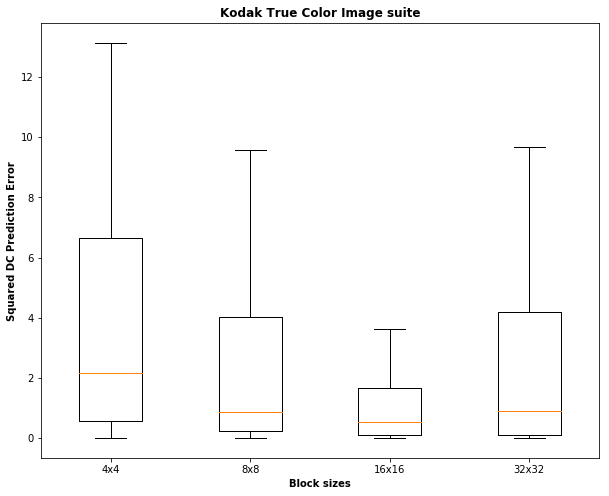

In [2]:
plt.figure(figsize=(10,8))
res = []
for b in range(0, 4):
    data = errors[b, :, :, :].flatten()
    res.append(data[np.nonzero(data)])

labels = ['4x4', '8x8', '16x16', '32x32']
plt.boxplot(res, labels=labels, showfliers=False)
plt.ylabel('Squared DC Prediction Error', fontweight='bold')
plt.title('Kodak True Color Image suite', fontweight='bold')
plt.xlabel('Block sizes', fontweight='bold');

# DC Pred Error Plane U

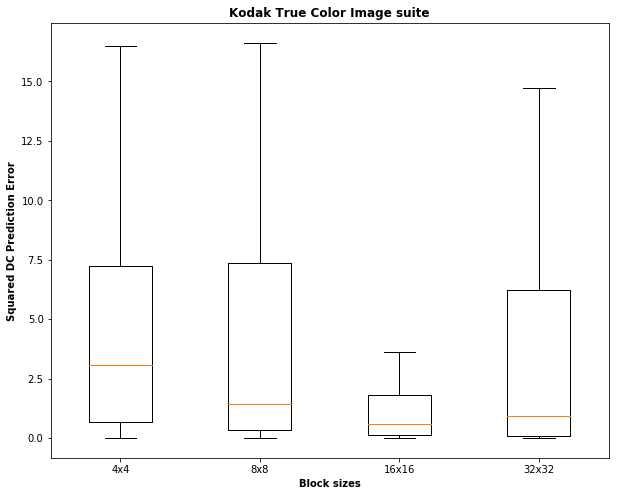

In [3]:
plt.figure(figsize=(10,8))
res = []
for b in range(0, 4):
    data = errors[b, :, :, 0].flatten()
    res.append(data[np.nonzero(data)])

labels = ['4x4', '8x8', '16x16', '32x32']
plt.boxplot(res, labels=labels, showfliers=False)
plt.ylabel('Squared DC Prediction Error', fontweight='bold')
plt.title('Kodak True Color Image suite', fontweight='bold')
plt.xlabel('Block sizes', fontweight='bold');

## DC Pred Error Plane V

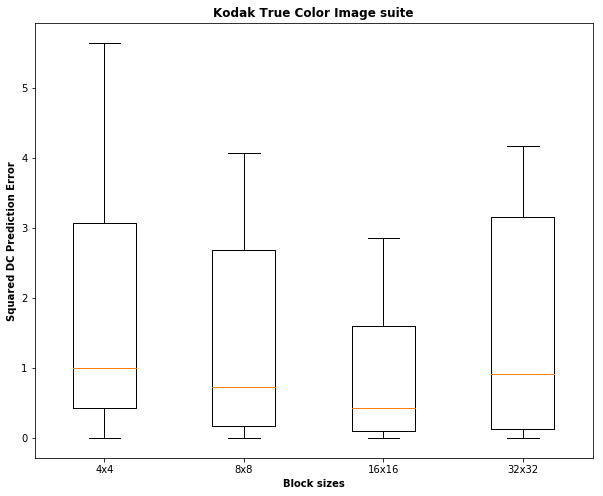

In [4]:
plt.figure(figsize=(10,8))
res = []
for b in range(0, 4):
    data = errors[b, :, :, 1].flatten()
    res.append(data[np.nonzero(data)])

labels = ['4x4', '8x8', '16x16', '32x32']
plt.boxplot(res, labels=labels, showfliers=False)
plt.ylabel('Squared DC Prediction Error', fontweight='bold')
plt.title('Kodak True Color Image suite', fontweight='bold')
plt.xlabel('Block sizes', fontweight='bold');